In [1]:
import numpy as np
import h5py
import tqdm
import copy
import torch
import pandas as pd
import sys
import random
import matplotlib.pyplot as plt
import csv
import argparse
import seaborn as sns
from collections import defaultdict

sys.path.append('../')


In [2]:
#Load Data

FedAvg_df_pred_loaded = pd.read_csv('[FedAvg]predictions.csv')
FedAvg_df_truth_loaded = pd.read_csv('[FedAvg]truth_values.csv')

FedDA_df_pred_loaded = pd.read_csv('[FedDA]predictions.csv')
FedDA_df_truth_loaded = pd.read_csv('[FedDA]truth_values.csv')

Proposed_df_pred_loaded = pd.read_csv('[proposed]predictions.csv')
Proposed_truth_loaded = pd.read_csv('[proposed]truth_values.csv')



In [9]:
print(FedAvg_df_pred_loaded.columns)


Index(['35', '157', '214', '370', '383', '436', '484', '495', '504', '521',
       '585', '732', '1053', '1436', '1557', '1658', '1694', '1788', '1951',
       '2000', '2221', '2702', '2782', '2811', '2854', '3065', '3130', '3288',
       '3459', '3568', '3604', '3652', '3738', '3768', '3802', '3823', '3838',
       '3997', '4199', '4384', '4691', '4788', '4897', '5012', '5097', '5244',
       '5498', '5681', '5711', '5836', '6062', '6118', '6187', '6267', '6293',
       '6434', '6491', '6492', '6496', '6671', '6674', '6836', '6866', '6963',
       '7138', '7222', '7239', '7345', '7412', '7578', '7737', '7785', '7916',
       '8041', '8071', '8165', '8171', '8229', '8253', '8276', '8326', '8366',
       '8378', '8465', '8583', '8692', '8889', '8918', '9031', '9039', '9106',
       '9164', '9373', '9514', '9520', '9674', '9698', '9733', '9766',
       '10000'],
      dtype='object')


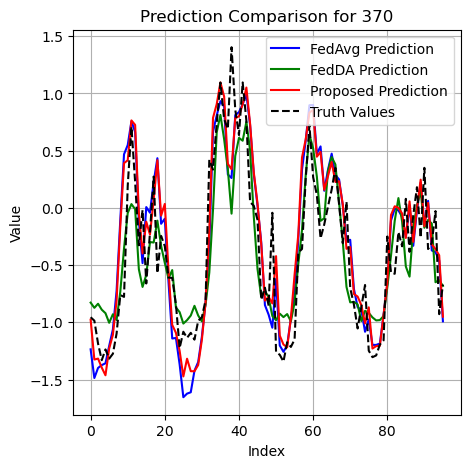

In [13]:
cell = 370

# 2. 각 알고리즘의 예측값 추출
FedAvg_pred = FedAvg_df_pred_loaded[str(cell)]
FedDA_pred = FedDA_df_pred_loaded[str(cell)]
Proposed_pred = Proposed_df_pred_loaded[str(cell)]
truth_values = FedAvg_df_truth_loaded[str(cell)]  # 모든 알고리즘의 실제값은 동일하므로 하나만 사용

# 3. 추출한 예측값들을 시각화하고 비교
plt.figure(figsize=(5, 5))
plt.plot(FedAvg_pred, label='FedAvg Prediction', color='blue')
plt.plot(FedDA_pred, label='FedDA Prediction', color='green')
plt.plot(Proposed_pred, label='Proposed Prediction', color='red')
plt.plot(truth_values, label='Truth Values', color='black', linestyle='dashed')

plt.legend()
plt.title(f'Prediction Comparison for {cell}')
plt.xlabel('Index')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

In [15]:
data = {
    ('Milano', 'MSE', 'SMS'): [0.3246, 0.3245, 0.3204, 0.3164, 0.3067],
    ('Milano', 'MSE', 'Call'): [0.0511, 0.0511, 0.0561, 0.051, 0.0491],
    ('Milano', 'MSE', 'Internet'): [0.1374, 0.1379, 0.1595, 0.1225, 0.1108],
    ('Milano', 'MAE', 'SMS'): [0.3531, 0.3534, 0.3562, 0.3471, 0.3403],
    ('Milano', 'MAE', 'Call'): [0.1566, 0.1567, 0.1744, 0.1542, 0.1535],
    ('Milano', 'MAE', 'Internet'): [0.2995, 0.3046, 0.3292, 0.2617, 0.2443],
    ('Trento', 'MSE', 'SMS'): [2.3127, 2.3168, 2.238, 1.9016, 1.8586],
    ('Trento', 'MSE', 'Call'): [0.4167, 0.4176, 0.4437, 0.3843, 0.3651],
    ('Trento', 'MSE', 'Internet'): [1.1075, 1.1193, 1.3762, 0.932, 0.904],
    ('Trento', 'MAE', 'SMS'): [0.8582, 0.8722, 0.8324, 0.7669, 0.7512],
    ('Trento', 'MAE', 'Call'): [0.3669, 0.3672, 0.3666, 0.3511, 0.3433],
    ('Trento', 'MAE', 'Internet'): [0.6643, 0.6693, 0.7479, 0.6072, 0.5962]
}

index = ["FedAvg", "FedAtt", "FedDA", "Proposed", "Proposed_LA"]
df = pd.DataFrame(data, index=index)


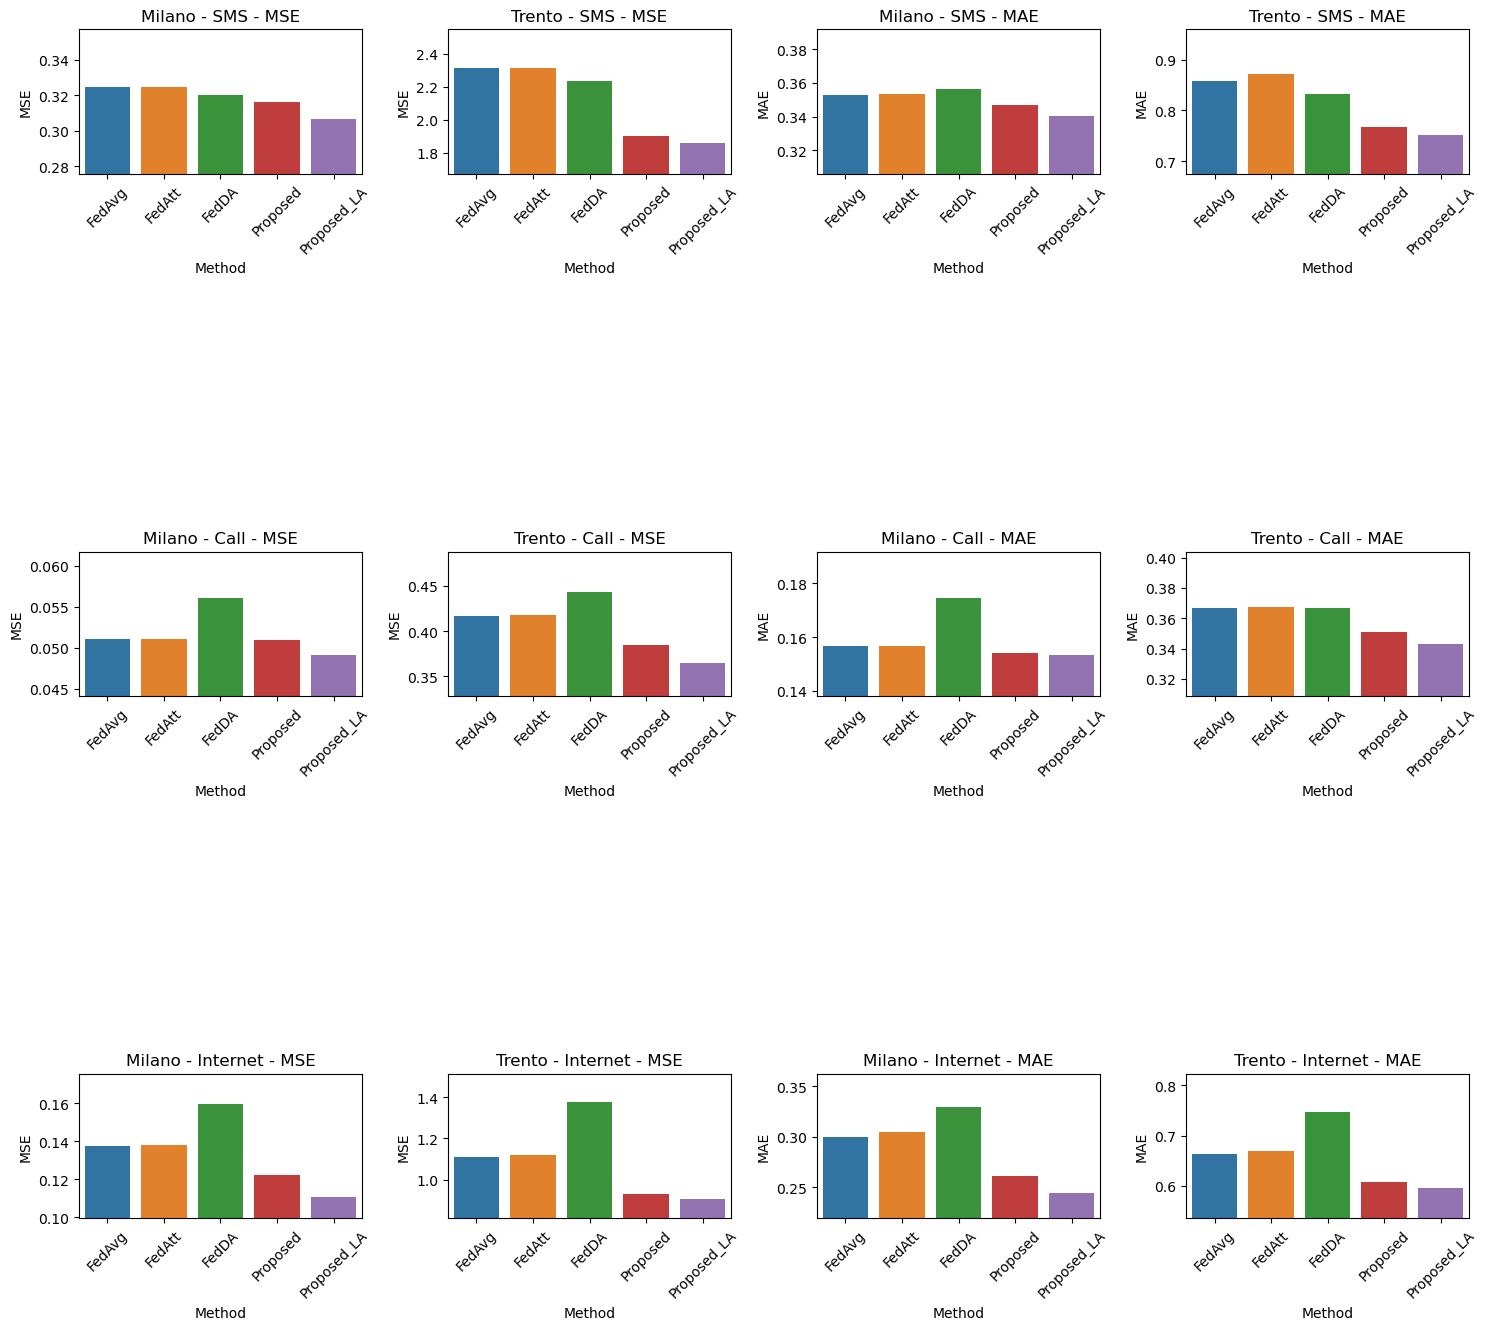

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (위에서 정의한 데이터프레임 코드)

communication_types = ['SMS', 'Call', 'Internet']
metrics = ['MSE', 'MAE']
cities = ['Milano', 'Trento']

plt.figure(figsize=(15, 15))

for i, ctype in enumerate(communication_types):
    for j, metric in enumerate(metrics):
        for k, city in enumerate(cities):
            plt.subplot(6, 4, i*8 + j*2 + k + 1)
            
            # 데이터 재구조화
            data = df[(city, metric, ctype)]
            data = data.reset_index()
            data.columns = ['Method', metric]
            
            # Seaborn 사용하여 막대 그래프 그리기
            sns.barplot(data=data, x='Method', y=metric)
            
            # y축 스케일 조정
            plt.ylim(data[metric].min() * 0.9, data[metric].max() * 1.1)
            
            plt.title(f'{city} - {ctype} - {metric}')
            plt.ylabel(metric)
            plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


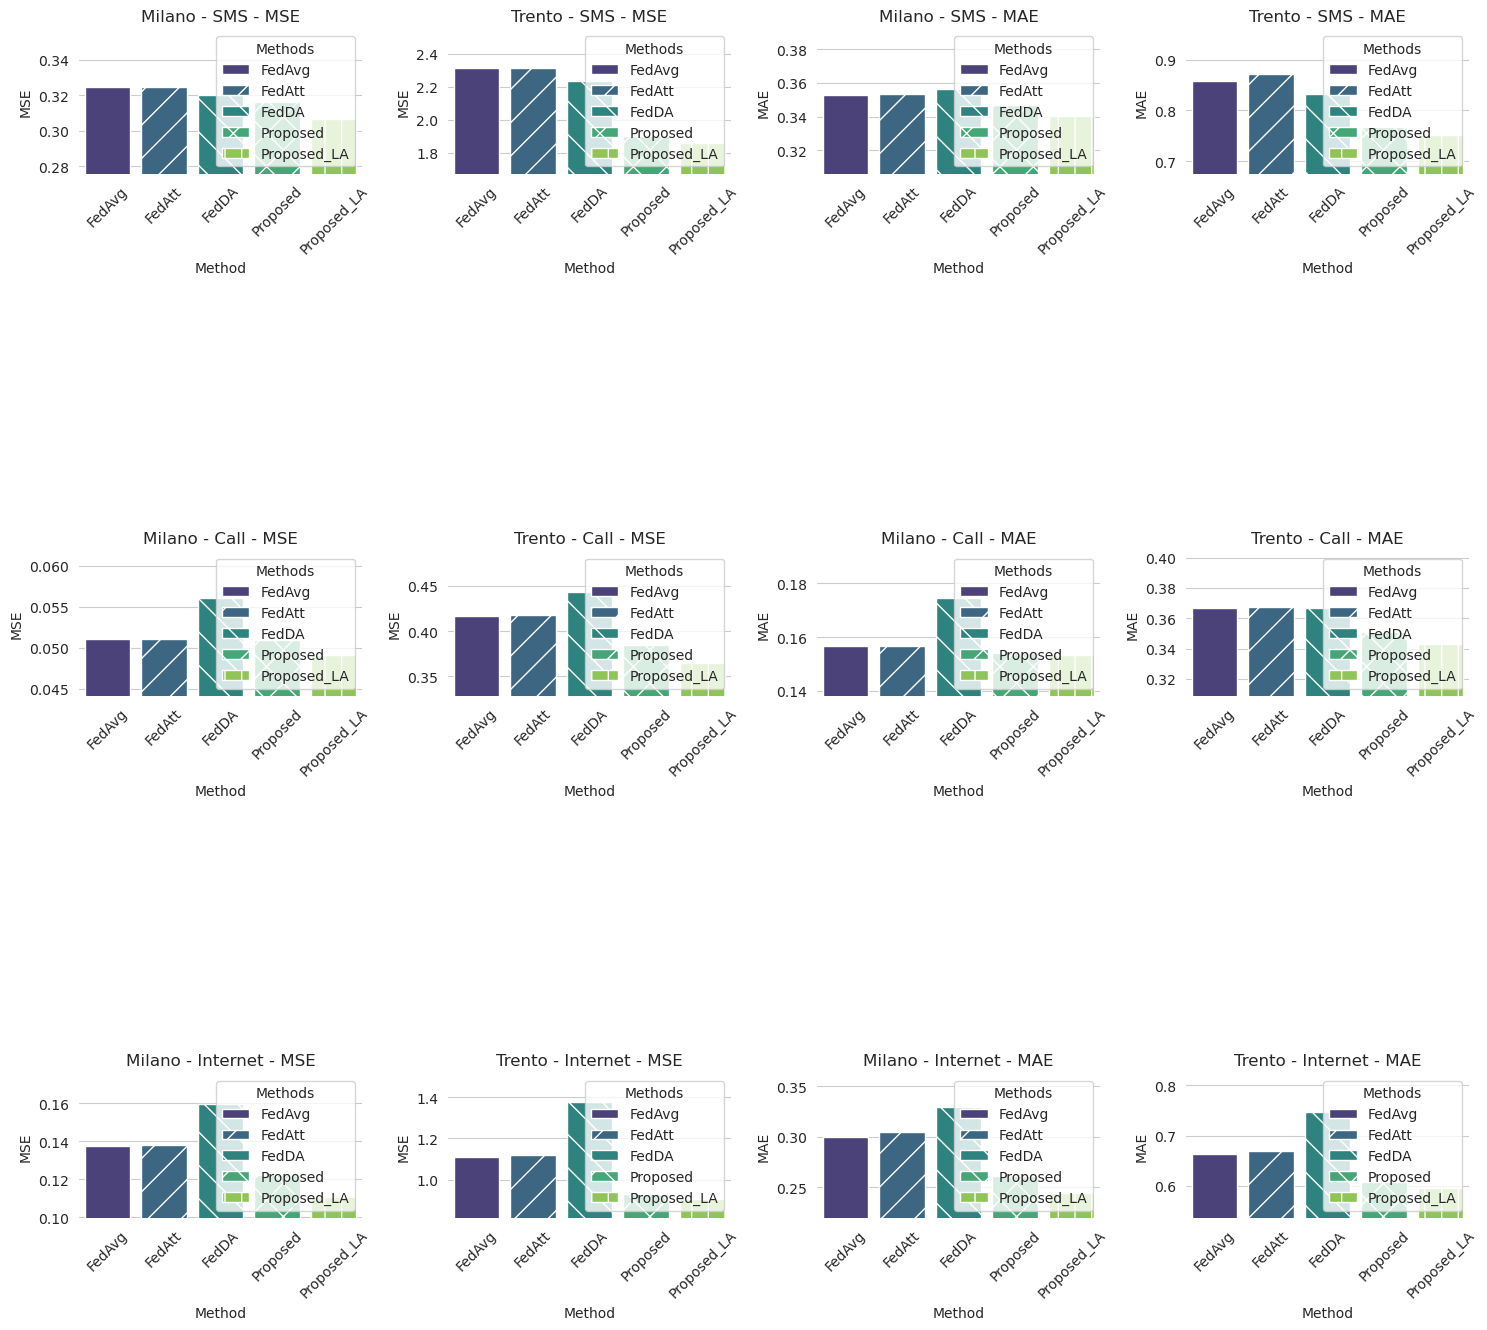

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (위에서 정의한 데이터프레임 코드)

communication_types = ['SMS', 'Call', 'Internet']
metrics = ['MSE', 'MAE']
cities = ['Milano', 'Trento']

# Seaborn 스타일 설정
sns.set_style("whitegrid")

plt.figure(figsize=(15, 15))

hatch_patterns = ["", "/", "\\", "x", "|"]

for i, ctype in enumerate(communication_types):
    for j, metric in enumerate(metrics):
        for k, city in enumerate(cities):
            ax = plt.subplot(6, 4, i*8 + j*2 + k + 1)
            
            # 데이터 재구조화
            data = df[(city, metric, ctype)]
            data = data.reset_index()
            data.columns = ['Method', metric]
            
            # Seaborn 사용하여 막대 그래프 그리기
            bars = sns.barplot(data=data, x='Method', y=metric, palette="viridis")
            
            # 막대에 해치 패턴 추가
            for bar, hatch in zip(bars.patches, hatch_patterns):
                bar.set_hatch(hatch)
            
            # y축 스케일 조정
            plt.ylim(data[metric].min() * 0.9, data[metric].max() * 1.1)
            
            plt.title(f'{city} - {ctype} - {metric}')
            plt.ylabel(metric)
            plt.xticks(rotation=45)

            # 축의 불필요한 spines 제거
            sns.despine(left=True, bottom=True)
            ax.legend(handles=bars.patches, labels=[m for m in data['Method']], title="Methods")

plt.tight_layout()
plt.show()


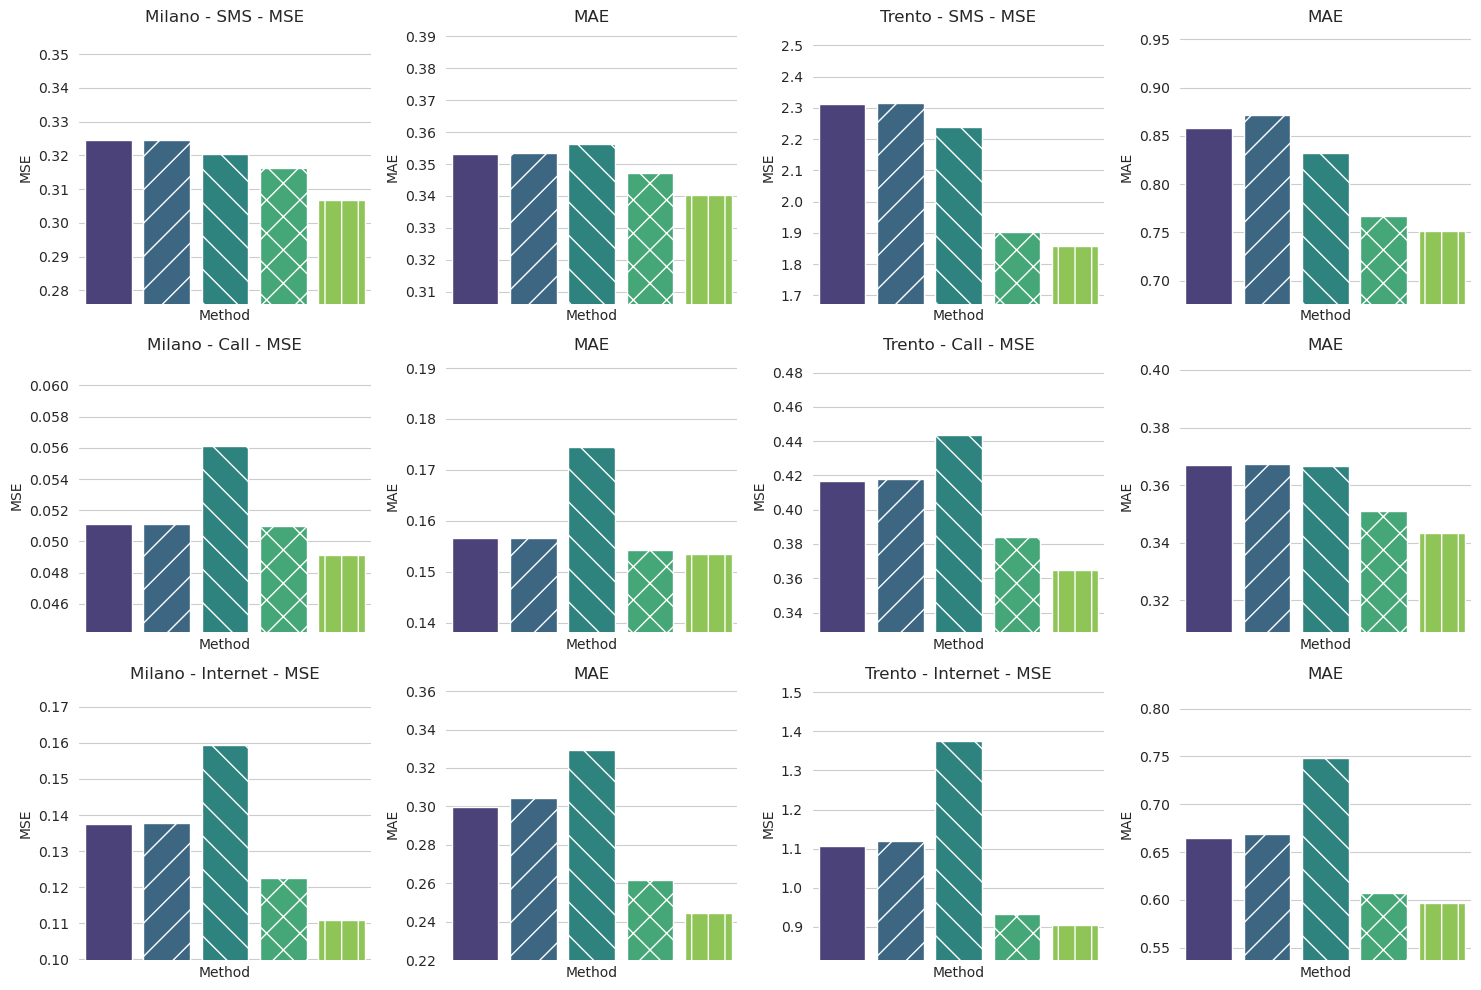

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

communication_types = ['SMS', 'Call', 'Internet']
metrics = ['MSE', 'MAE']
cities = ['Milano', 'Trento']

# Seaborn 스타일 설정
sns.set_style("whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(15, 10))

hatch_patterns = ["", "/", "\\", "x", "|"]

for i, ctype in enumerate(communication_types):
    for j, city in enumerate(cities):
        for k, metric in enumerate(metrics):
            
            # 서브그래프 위치 계산
            ax_idx = i*4 + j*2 + k + 1
            ax = plt.subplot(3, 4, ax_idx)
            
            # 데이터 재구조화
            data = df[(city, metric, ctype)]
            data = data.reset_index()
            data.columns = ['Method', metric]
            
            # Seaborn 사용하여 막대 그래프 그리기
            bars = sns.barplot(data=data, x='Method', y=metric, palette="viridis", ax=ax)
            
            # 막대에 해치 패턴 추가
            for bar, hatch in zip(bars.patches, hatch_patterns):
                bar.set_hatch(hatch)
            
            # y축 스케일 조정
            ax.set_ylim(data[metric].min() * 0.9, data[metric].max() * 1.1)
            
            # 서브그래프 타이틀 설정
            if k == 0:
                ax.set_title(f'{city} - {ctype} - {metric}')
            else:
                ax.set_title(metric)
                
            # 레이블 크기 조정
            ax.set_ylabel(metric, fontsize=10)
            ax.set_xticks([])
            
            # 축의 불필요한 spines 제거
            sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


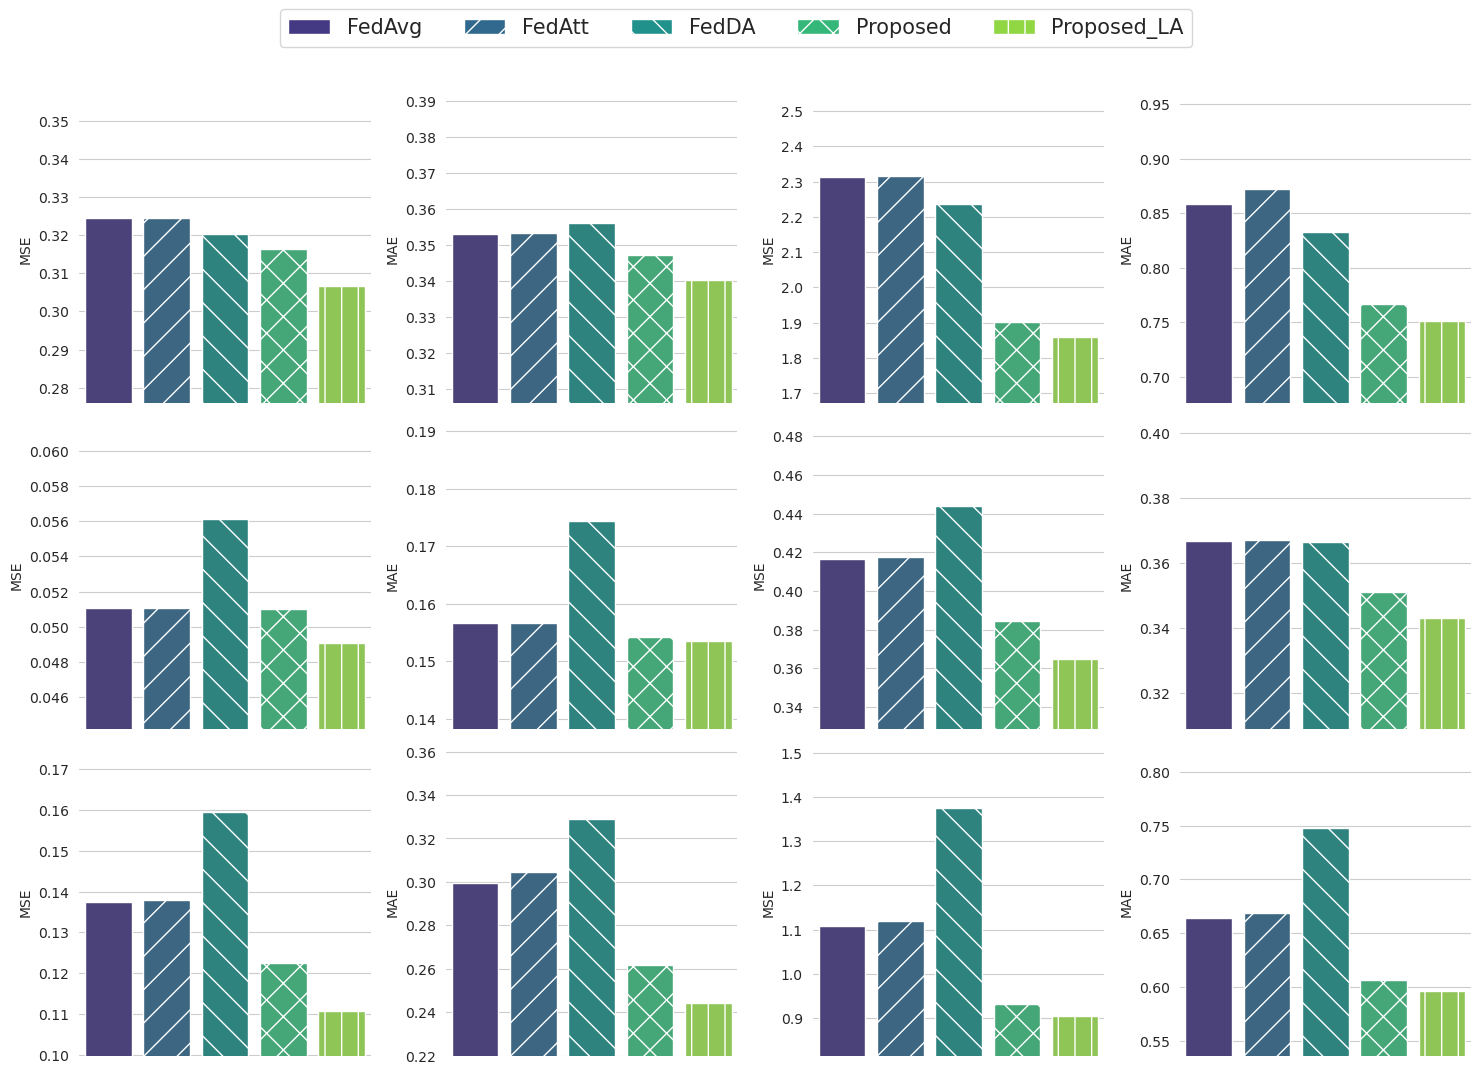

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

communication_types = ['SMS', 'Call', 'Internet']
metrics = ['MSE', 'MAE']
cities = ['Milano', 'Trento']

# Seaborn 스타일 설정
sns.set_style("whitegrid")

# 그래프 크기 설정
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

hatch_patterns = ["", "/", "\\", "x", "|"]
methods = df.index.tolist()
colors = sns.color_palette("viridis", n_colors=len(methods))

legend_handles = []

for i, ctype in enumerate(communication_types):
    for j, city in enumerate(cities):
        for k, metric in enumerate(metrics):
            
            # 서브그래프 위치 계산
            ax = axes[i, j*2 + k]
            
            # 데이터 재구조화
            data = df[(city, metric, ctype)]
            data = data.reset_index()
            data.columns = ['Method', metric]
            
            # Seaborn 사용하여 막대 그래프 그리기
            bars = sns.barplot(data=data, x='Method', y=metric, palette=colors, ax=ax)
            
            # 막대에 해치 패턴 추가
            for idx, bar in enumerate(bars.patches):
                bar.set_hatch(hatch_patterns[idx])
                if i == j == k == 0:  # 첫번째 그래프에서만 legend 핸들 저장
                    legend_handles.append(plt.Rectangle((0,0),1,1, fc=colors[idx], hatch=hatch_patterns[idx]))
            
            
            ax.set_title(f'{city} - {ctype} - {metric}')

            # y축 스케일 조정
            ax.set_ylim(data[metric].min() * 0.9, data[metric].max() * 1.1)
            
            # y 축 라벨 설정
            ax.set_ylabel(metric)

            
            # x 축 라벨 및 ticks 제거
            ax.set_xticks([])
            ax.set_xlabel('')
            
            # 축의 불필요한 spines 제거
            sns.despine(left=True, bottom=True)

# 상단에 legend 표시
fig.legend(legend_handles, methods, loc='upper center', ncol=len(methods), fontsize=15, bbox_to_anchor=(0.5, 1.08))

plt.tight_layout()
plt.show()
